# Example notebook `neuralib.model.rastermap`

- See also the reference GitHub [rastermap](https://github.com/MouseLand/rastermap)
    - [cellular example](https://colab.research.google.com/github/MouseLand/rastermap/blob/main/notebooks/rastermap_largescale.ipynb#scrollTo=E_WTZXx0Io0Y)
    - [widefield example](https://colab.research.google.com/github/MouseLand/rastermap/blob/main/notebooks/rastermap_widefield.ipynb)

In [1]:
import numpy as np

from neuralib.imglib.io import load_sequence
from neuralib.io.dataset import load_example_rastermap_2p_cache
from neuralib.model.rastermap import (
    Covariant,
    run_rastermap,
    plot_rastermap,
    plot_cellular_spatial,
    plot_wfield_spatial,
    RasterOptions
)

In [2]:
%load_ext autoreload
%autoreload

### Example of cellular dataset
- Two-photon imaging during linear treadmill
- Tracking of behavioral variables. velocity, pupil area

In [3]:
# download cache, replace your own neural activity array
cache = load_example_rastermap_2p_cache(cached=True, rename_file='raster_2p')
result = run_rastermap(cache['neural_activity'], bin_size=10, dtype='cellular')

2025-12-20 14:08:30,076 [INFO] normalizing data across axis=1
2025-12-20 14:08:30,503 [INFO] projecting out mean along axis=0
2025-12-20 14:08:30,867 [INFO] data normalized, 0.79sec
2025-12-20 14:08:30,868 [INFO] sorting activity: 1118 valid samples by 108128 timepoints
2025-12-20 14:08:35,778 [INFO] n_PCs = 128 computed, 5.70sec
2025-12-20 14:08:36,152 [INFO] 31 clusters computed, time 6.08sec
2025-12-20 14:08:36,504 [INFO] clusters sorted, time 6.43sec
2025-12-20 14:08:36,533 [INFO] clusters upsampled, time 6.46sec
2025-12-20 14:08:37,053 [INFO] rastermap complete, time 6.98sec


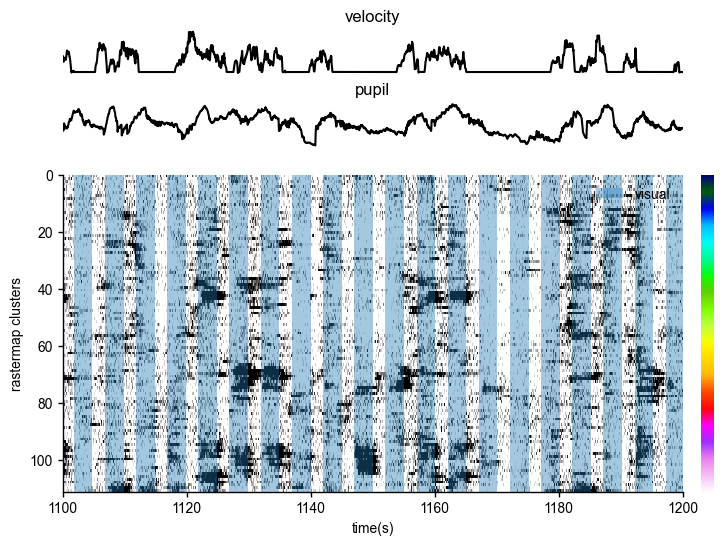

In [4]:
# plot map together with behavioral measurement (running velocity and pupil size)
# In example, interpolated time has same shape between covariant and activity, but non-interpolated time is also supported
time = cache['image_time']
vel = Covariant('velocity', dtype='continuous', time=time, value=cache['velocity'])
pupil = Covariant('pupil', dtype='continuous', time=time, value=cache['pupil_area'])
visual_event = Covariant('visual', dtype='event', time=cache['visual_stim_time'], value=None)
plot_rastermap(result, time, time_range=(1100, 1200), covars=[vel, pupil, visual_event])

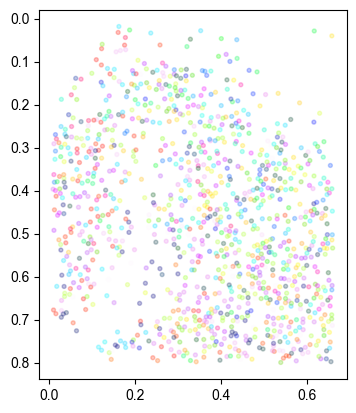

In [5]:
# plot the neuron location with color-coded
xy_pos = cache['xy_pos']
plot_cellular_spatial(result, xy_pos[0], xy_pos[1])

### Example of widefield imaging dataset
- Wide-field imaging for retinotopic mapping using circular patch visual stimuli

In [6]:
# load sequence neural activity from path OR an array with `Array[Any, [T, H, W]]`
tiff_path = ...
neural_activity = load_sequence(tiff_path)
nframe, height, width = neural_activity.shape

opt: RasterOptions = {
    'n_clusters': 30,
    'n_PCs': 128,
    'locality': 0.5,
    'time_lag_window': 10,
    'grid_upsample': 10
}
result = run_rastermap(neural_activity,
                       bin_size=1000,
                       dtype='wfield',
                       options=opt,
                       svd_components=128,
                       svd_cache=...)  # local pkl cache for svd compute

Loading TIFF sequence: 100%|██████████| 1/1 [00:00<00:00, 273.96file/s]


2025-04-22 21:54:08,099 [INFO] data normalized, 0.06sec
2025-04-22 21:54:08,106 [INFO] sorting activity: 234840 valid samples by 2816 timepoints
2025-04-22 21:54:24,384 [INFO] 30 clusters computed, time 16.34sec
2025-04-22 21:54:24,569 [INFO] clusters sorted, time 16.53sec
2025-04-22 21:54:25,171 [INFO] clusters upsampled, time 17.13sec
2025-04-22 21:54:25,193 [INFO] rastermap complete, time 17.15sec


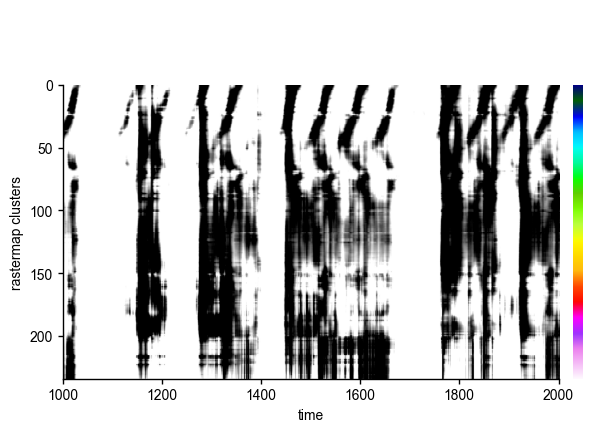

In [7]:
# plot rastermap
plot_rastermap(result, np.arange(result.n_samples), time_range=(1000, 2000))

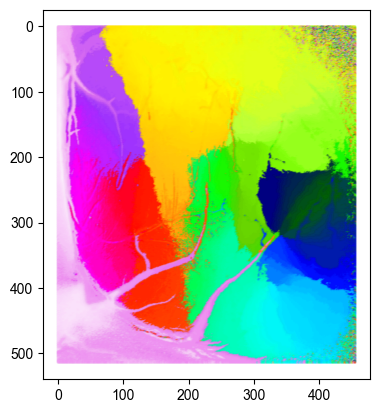

In [8]:
# plot the spatial location across xy pixel
plot_wfield_spatial(result, width, height)